# Sample from probability distributions

In [11]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

## Pseudorandom number generators and seeding
Computes can only generate pseduo-random numbers. This means that the numbers are not truly random, but are generated by a deterministic algorithm.This algorithm is based on a seed value, which is used to initialize the random number generator. If the seed is the same, the sequence of random numbers generated will be the same. Although the generated numbers are not truly random, they are useful for many purposes, such as simulations, modeling, and statistical analysis.

In [12]:
npr.seed(0)
x1 = npr.uniform(low=0, high=1, size=10)
print("x1:", x1)

x2 = npr.uniform(low=0, high=1, size=10)
print("x2:", x2)

npr.seed(0)
x3 = npr.uniform(low=0, high=1, size=10)
print("x3:", x3)

print("x1 == x3:", np.all(x1 == x3))

x1: [0.549 0.715 0.603 0.545 0.424 0.646 0.438 0.892 0.964 0.383]
x2: [0.792 0.529 0.568 0.926 0.071 0.087 0.02  0.833 0.778 0.87 ]
x3: [0.549 0.715 0.603 0.545 0.424 0.646 0.438 0.892 0.964 0.383]
x1 == x3: True


## Sample from standard probability distributions
Numpy provides a number of functions for generating random numbers from many standard probability distributions.

### Bernoulli distribution

<BarContainer object of 2 artists>

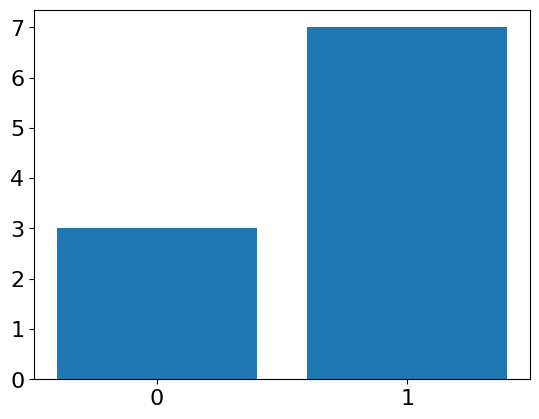

In [13]:
x = npr.binomial(n = 1, p = 0.5, size = 10)
plt.bar(['0','1'], [sum(x == 0), sum(x == 1)])

### Uniform distribution

(array([0.96, 1.02, 1.14, 0.92, 1.12, 1.08, 1.06, 1.08, 1.08, 1.  , 0.94,
        0.92, 0.88, 1.06, 1.  , 0.74, 0.74, 1.12, 1.  , 1.14]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

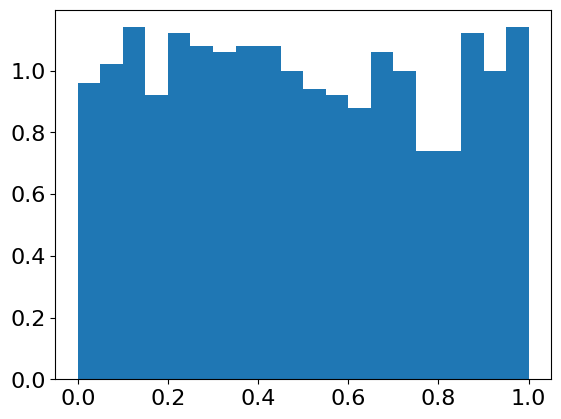

In [14]:
x = npr.uniform(low=0, high=1, size=1000)
plt.hist(x, bins=20, range = (0,1), density=True)

### Normal/Gaussian distribution

(array([0.   , 0.   , 0.   , 0.004, 0.008, 0.011, 0.004, 0.034, 0.098,
        0.154, 0.146, 0.334, 0.259, 0.371, 0.368, 0.473, 0.401, 0.289,
        0.3  , 0.139, 0.143, 0.098, 0.038, 0.049, 0.023, 0.008, 0.004,
        0.   , 0.   , 0.   ]),
 array([-4.   , -3.733, -3.467, -3.2  , -2.933, -2.667, -2.4  , -2.133,
        -1.867, -1.6  , -1.333, -1.067, -0.8  , -0.533, -0.267,  0.   ,
         0.267,  0.533,  0.8  ,  1.067,  1.333,  1.6  ,  1.867,  2.133,
         2.4  ,  2.667,  2.933,  3.2  ,  3.467,  3.733,  4.   ]),
 <BarContainer object of 30 artists>)

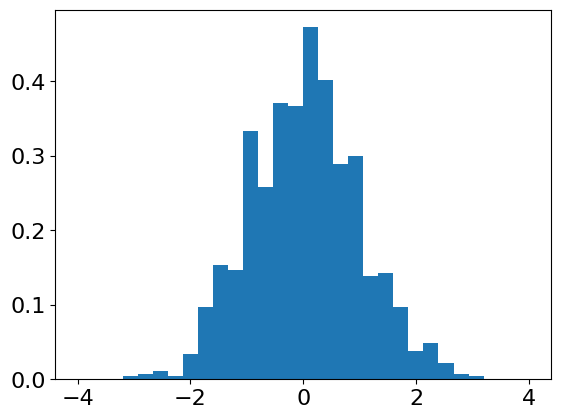

In [15]:
x = npr.normal(loc=0, scale=1, size=1000)
plt.hist(x, bins=30, range = (-4,4), density=True)

## Why is this useful?
Sampling from probability distributions is useful because it allows us to simulate experiments with random outcomes.

### Simulate the Monty Hall problem
The Monty Hall problem is a famous probability puzzle. In the classic setup, you're on a game show with three doors. Behind one door is a car (prize), and behind the other two doors are goats. After you choose a door, the host (Monty) opens one of the other doors, revealing a goat. Then, Monty gives you the choice to either stick with your original door or switch to the remaining unopened door. The question is: should you switch?

Although we could solve this problem analytically, we can also simulate the game many times to estimate the probability of winning for each strategy.

In [16]:
def monty_hall_simulation(n_simulations=10000, switch=True):
    """
    Simulate the Monty Hall problem.

    Parameters:
    - n_simulations: Number of simulations to run.
    - switch: Whether the contestant switches their choice.

    Returns:
    - win_rate: The proportion of games where the contestant wins the car.
    """
    wins = 0

    for _ in range(n_simulations):
        # Randomly place the car behind one of the three doors (0, 1, or 2)
        doors = [0, 1, 2]
        car_door = npr.choice(doors)

        # Contestant makes an initial choice (randomly)
        contestant_choice = npr.choice(doors)

        # Monty opens a door that has a goat (and isn't the contestant's choice)
        available_doors = [
            door for door in doors if door != contestant_choice and door != car_door
        ]
        monty_opens = npr.choice(available_doors)

        # If the contestant switches
        if switch:
            # The contestant switches to the other unopened door
            remaining_door = [
                door
                for door in doors
                if door != contestant_choice and door != monty_opens
            ][0]
            contestant_choice = remaining_door

        # Check if the contestant won the car
        if contestant_choice == car_door:
            wins += 1

    # Calculate the win rate
    win_rate = wins / n_simulations
    return win_rate


# Run the simulation
n_simulations = 10000
win_rate_switch = monty_hall_simulation(n_simulations, switch=True)
win_rate_stay = monty_hall_simulation(n_simulations, switch=False)

print(f"Win rate when switching: {win_rate_switch * 100:.2f}%")
print(f"Win rate when staying: {win_rate_stay * 100:.2f}%")


Win rate when switching: 66.85%
Win rate when staying: 34.11%


### Estimate the value of $\pi$
Simulating experiments with random outcomes is also useful outside of probability theory. For example, we can estimate the value of $\pi$ by simulating random points in a square and counting the number of points that fall within the incircle.

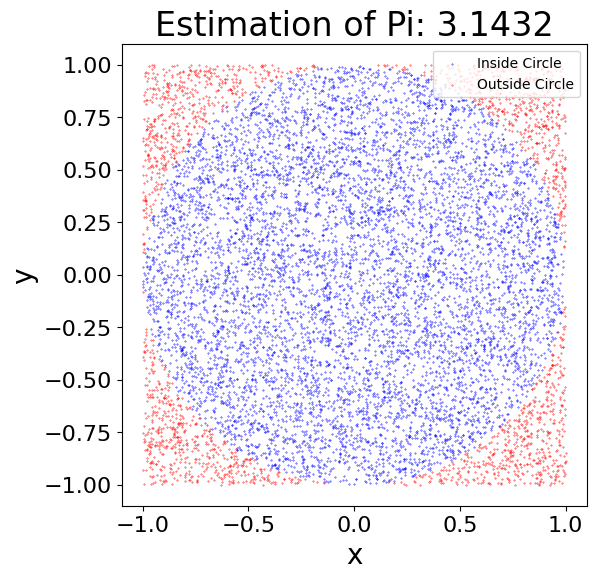

Estimated value of Pi: 3.1432


In [17]:
def estimate_pi(n_points=10000, plot=False):
    """
    Estimate the value of pi using the Monte Carlo method.
    
    Parameters:
    - n_points: Number of random points to generate.
    - plot: Whether to plot the points and the circle.
    
    Returns:
    - pi_estimate: Estimated value of pi.
    """
    # Generate random points (x, y) within the square of side length 1
    x = npr.uniform(-1, 1, n_points)
    y = npr.uniform(-1, 1, n_points)

    # Calculate the distance from the origin for each point
    distance = np.sqrt(x**2 + y**2)

    # Count how many points fall inside the quarter-circle (radius 1)
    inside_circle = distance <= 1

    # Estimate pi as 4 times the ratio of points inside the circle to total points
    pi_estimate = 4*np.sum(inside_circle) / n_points

    if plot:
        # Plot the points and the quarter-circle
        plt.figure(figsize=(6, 6))
        plt.scatter(x[inside_circle], y[inside_circle], color='blue', label='Inside Circle', s=0.1)
        plt.scatter(x[~inside_circle], y[~inside_circle], color='red', label='Outside Circle', s=0.1)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(loc='best')
        plt.title(f'Estimation of Pi: {pi_estimate:.4f}')
        plt.show()

    return pi_estimate

# Run the simulation with 10,000 points and plot the result
pi_estimated = estimate_pi(n_points=10000, plot=True)
print(f"Estimated value of Pi: {pi_estimated}")


## Sample from arbitrary probability distributions
Sampling from arbitrary probability distributions is a whole field of study in itself and is of 
great importance in many areas of science and engineering. There are many methods for sampling from 
arbitrary distributions, ranging from simple methods like the rejection sampling algorithm and 
importance sampling to more advanced methods like Markov Chain Monte Carlo (MCMC) algorithms.
A very good textbook on this topic is 
["Monte Carlo Statistical Methods" by Robert and Casella](https://link.springer.com/book/10.1007/978-1-4757-4145-2).

### Rejection sampling algorithm
The [rejection sampling algorithm](https://en.wikipedia.org/wiki/Rejection_sampling) is a simple 
method for sampling from a probability distribution 
whose density function is known up to a constant factor. It is based on the observation that to 
sample a random variable in one dimension, one can perform a uniformly random sampling of 
the two-dimensional Cartesian graph, and keep the samples in the region under the graph of 
its density function. The idea is to sample points from a simple proposal distribution and accept 
or reject them based on the ratio of the target density
function to the proposal density function.

#### Sample from a triangular distribution using rejection sampling

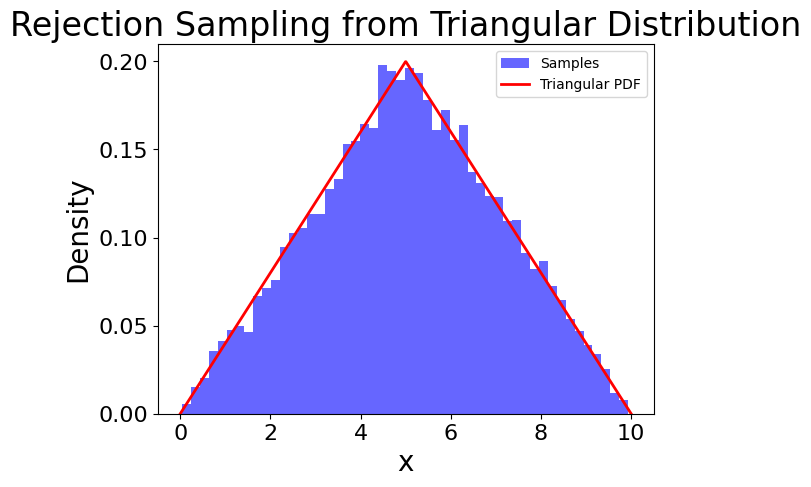

In [18]:
def triangular_pdf(x, a, b, c):
    """Triangular distribution PDF."""
    if a <= x < c:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif c <= x <= b:
        return 2 * (b - x) / ((b - a) * (b - c))
    else:
        return 0

def rejection_sampling_triangular(n_samples, a, b, c):
    """
    Rejection sampling from a triangular distribution.
    
    Parameters:
    - n_samples: Number of samples to generate.
    - a: Minimum value of the triangular distribution.
    - b: Maximum value of the triangular distribution.
    - c: Mode (peak) of the triangular distribution.
    
    Returns:
    - samples: Array of generated samples.
    """
    samples = []
    
    # Proposal distribution is uniform on [a, b]
    proposal_sampler = lambda: np.random.uniform(a, b)
    
    # Find the maximum value of the triangular PDF for normalization
    max_pdf = triangular_pdf(c, a, b, c)
    
    while len(samples) < n_samples:
        # Step 1: Generate a proposal sample
        x = proposal_sampler()
        
        # Step 2: Generate a uniform random number for acceptance criterion
        u = npr.uniform(0, max_pdf)
        
        # Step 3: Accept or reject the sample based on the triangular PDF
        if u <= triangular_pdf(x, a, b, c):
            samples.append(x)
    
    return np.array(samples)

# Parameters for the triangular distribution
a = 0   # Minimum
b = 10  # Maximum
c = 5   # Mode

# Generate samples using rejection sampling
n_samples = 10000
samples = rejection_sampling_triangular(n_samples, a, b, c)

# Plot the samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='blue', label='Samples')

# Plot the triangular PDF for comparison
x_vals = np.linspace(a, b, 1000)
pdf_vals = [triangular_pdf(x, a, b, c) for x in x_vals]
plt.plot(x_vals, pdf_vals, label='Triangular PDF', color='red', lw=2)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling from Triangular Distribution')
plt.legend()
plt.show()


#### Uniformly sample from a circle using rejection sampling

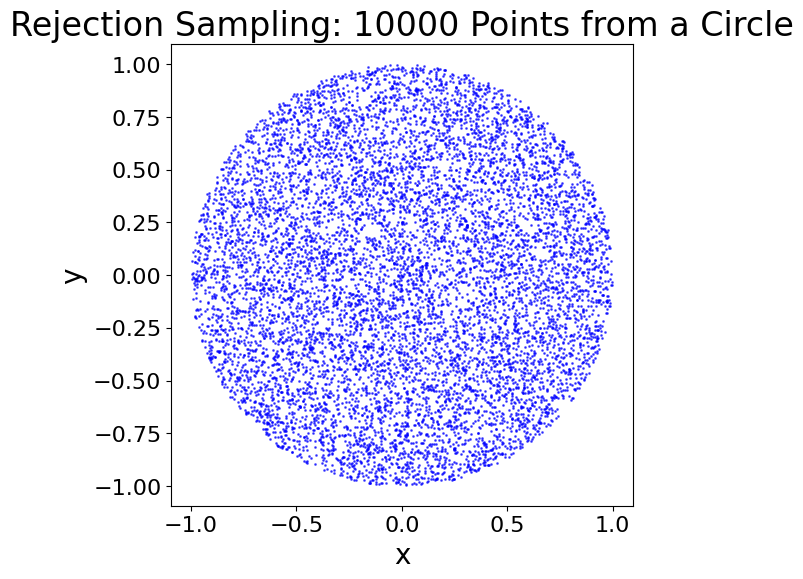

In [19]:
def rejection_sampling_circle(n_samples, radius=1):
    """
    Rejection sampling to generate points uniformly from within a circle.
    
    Parameters:
    - n_samples: The number of points to generate.
    - radius: The radius of the circle (default is 1).
    
    Returns:
    - samples: Generated points from within the circle.
    """
    samples = []
    while len(samples) < n_samples:
        # Step 1: Generate random points in the square bounding box
        x = npr.uniform(-radius, radius)
        y = npr.uniform(-radius, radius)
        
        # Step 2: Check if the point is inside the circle
        if x**2 + y**2 <= radius**2:
            samples.append((x, y))
    
    return np.array(samples)

# Generate points using rejection sampling
n_samples = 10000
samples = rejection_sampling_circle(n_samples)

# Plot the results
plt.figure(figsize=(6, 6))
plt.scatter(samples[:, 0], samples[:, 1], s=1, color='blue', alpha=0.6)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure the aspect ratio is equal
plt.title(f"Rejection Sampling: {n_samples} Points from a Circle")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Importance sampling
[Importance sampling](https://en.wikipedia.org/wiki/Importance_sampling) is a method for sampling 
from a target distribution $p(x)$ by using samples from a different distribution $q(x)$ which is 
easier to sample from. $q(x)$ is called the proposal distribution. The key idea is to weight each 
sample by the ratio of the target distribution to the proposal distribution.

#### Sample from a trigonometric distribution using importance sampling

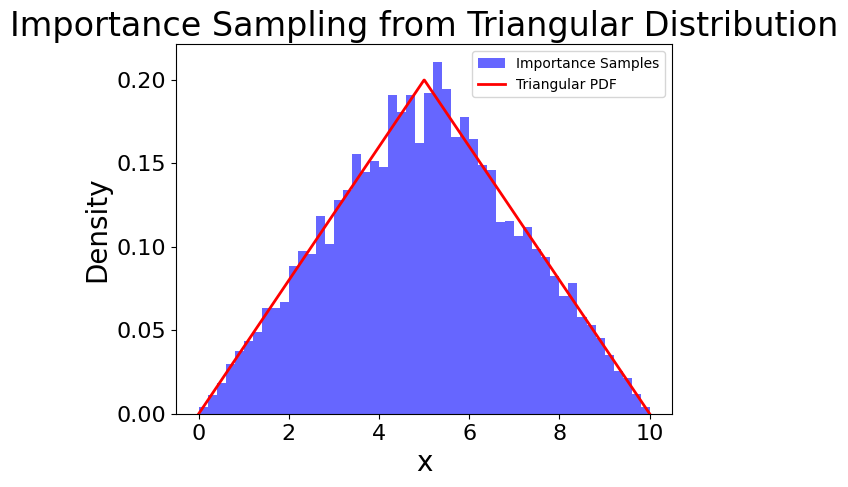

In [20]:
def triangular_pdf(x, a, b, c):
    """Triangular distribution PDF."""
    if a <= x < c:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif c <= x <= b:
        return 2 * (b - x) / ((b - a) * (b - c))
    else:
        return 0

def importance_sampling_triangular(n_samples, a, b, c):
    """
    Importance sampling to generate points from a triangular distribution.
    
    Parameters:
    - n_samples: Number of samples to generate.
    - a: Minimum value of the triangular distribution.
    - b: Maximum value of the triangular distribution.
    - c: Mode (peak) of the triangular distribution.
    
    Returns:
    - samples: Weighted samples from the target distribution.
    - weights: Importance weights for each sample.
    """
    # Proposal distribution: Uniform on [a, b]
    proposal_sampler = lambda: npr.uniform(a, b, n_samples)
    proposal_pdf = 1 / (b - a)  # Uniform PDF in [a, b]

    # Draw samples from the proposal distribution
    samples = proposal_sampler()

    # Calculate the weights: target_pdf(x) / proposal_pdf(x)
    target_pdfs = np.array([triangular_pdf(x, a, b, c) for x in samples])
    weights = target_pdfs / proposal_pdf

    # Normalize the weights
    weights /= np.sum(weights)

    return samples, weights

# Parameters for the triangular distribution
a = 0   # Minimum
b = 10  # Maximum
c = 5   # Mode

# Generate samples using importance sampling
n_samples = 10000
samples, weights = importance_sampling_triangular(n_samples, a, b, c)

# Plot the weighted histogram of the samples
plt.hist(samples, bins=50, weights=weights, density=True, alpha=0.6, color='blue', label='Importance Samples')

# Plot the triangular PDF for comparison
x_vals = np.linspace(a, b, 1000)
pdf_vals = [triangular_pdf(x, a, b, c) for x in x_vals]
plt.plot(x_vals, pdf_vals, label='Triangular PDF', color='red', lw=2)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Importance Sampling from Triangular Distribution')
plt.legend()
plt.show()
